In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    loss_train = []
    loss_test = []    
    
    for index in range(0,k):
        y_test = y[k_indices][index]
        mask = np.ones(len(y), dtype = bool)
        ex_ind = k_indices[index]
        mask[ex_ind] = False
        y_train = y[mask]
        
        x_test = x[k_indices][index]
        mask = np.ones(len(y), dtype = bool)
        ex_ind = k_indices[index]
        mask[ex_ind] = False
        x_train = x[mask]
        


        x_poly_train = build_poly(x_train,degree)
        _,w = ridge_regression(y_train, x_poly_train, lambda_)
        loss_train.append(compute_mse(y_train, x_poly_train,w))
        
        x_poly_test = build_poly(x_test, degree)
        loss_test.append(compute_mse(y_test, x_poly_test,w))
        
    loss_tr = np.mean(loss_train)
    loss_te = np.mean(loss_test)
    return loss_tr, loss_te

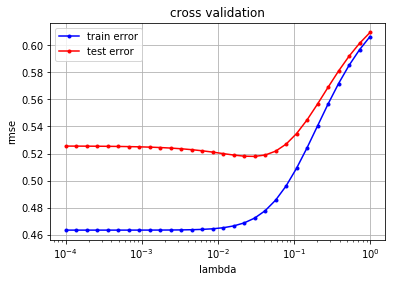

In [5]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []

    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_,seed)
        rmse_tr.append(np.sqrt(loss_tr*2))
        rmse_te.append(np.sqrt(loss_te*2))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()


## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

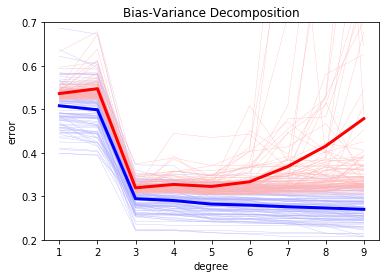

In [29]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        x_train,x_test,y_train,y_test = split_data(x, y, ratio_train, seed)

        for degree in degrees:
            x_poly_train = build_poly(x_train,degree)
            x_poly_test = build_poly(x_test,degree)
            _, w = least_squares(y_train,x_poly_train)

            mse_train = compute_mse(y_train,x_poly_train,w)
            mse_test = compute_mse(y_test,x_poly_test,w)
            
            rmse_tr[index_seed][degree-1] = np.sqrt(mse_train*2)
            rmse_te[index_seed][degree-1] = np.sqrt(mse_test*2)
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

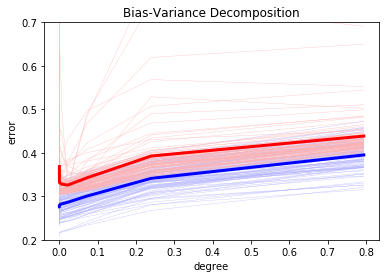

In [50]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degree = 7
    lambdas = np.logspace(-10, -0.1, 20)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(lambdas)))
    rmse_te = np.empty((len(seeds), len(lambdas)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        x_train,x_test,y_train,y_test = split_data(x, y, ratio_train, seed)

        for i in range(0, len(lambdas)):
            lambda_ = lambdas[i]
            x_poly_train = build_poly(x_train,degree)
            x_poly_test = build_poly(x_test,degree)
            _,w = ridge_regression(y_train, x_poly_train, lambda_)

            mse_train = compute_mse(y_train,x_poly_train,w)
            mse_test = compute_mse(y_test,x_poly_test,w)
            rmse_tr[index_seed][i] = np.sqrt(mse_train*2)
            rmse_te[index_seed][i] = np.sqrt(mse_test*2)

    bias_variance_decomposition_visualization(lambdas, rmse_tr, rmse_te)

bias_variance_demo()